In [1]:

Mtotal = 355.3 /1000    # g to kg
Marm = 6 / 1000         # g to kg
Larm = 84 / 1000        # mm to m
Warm = 4 / 1000         # mm to m
Harm = 1 / 1000         # mm to m

Mbody = 268.1 / 1000    # g to kg
Lbody = 89 / 1000       # mm to m
Wbody = 60 / 1000       # mm to m
Hbody = 42 / 1000       # mm to m

r = 62.23 / 1000        # mm to m
Mrotor = 15.8 / 1000    # g to kg

ix = (1/12) * Mbody * (Wbody**2 + Hbody**2) \
   + 4 * ((1/12) * Marm * (Harm**2 + Warm**2) + Marm * Larm**2) \
   + 2 * (Mrotor * Larm**2)

iy = (1/12) * Mbody * (Lbody**2 + Hbody**2) \
   + 4 * ((1/12) * Marm * (Larm**2 + Warm**2) + Marm * Larm**2) \
   + 2 * (Mrotor * Larm**2)

iz = (1/12) * Mbody * (Lbody**2 + Wbody**2) \
   + 4 * ((1/12) * Marm * (Larm**2 + Harm**2)) \
   + 4 * (Mrotor * r**2)

print(f"Ix = {ix:.6f} kg·m²")
print(f"Iy = {iy:.6f} kg·m²")
print(f"Iz = {iz:.6f} kg·m²")


Ix = 0.000512 kg·m²
Iy = 0.000623 kg·m²
Iz = 0.000516 kg·m²


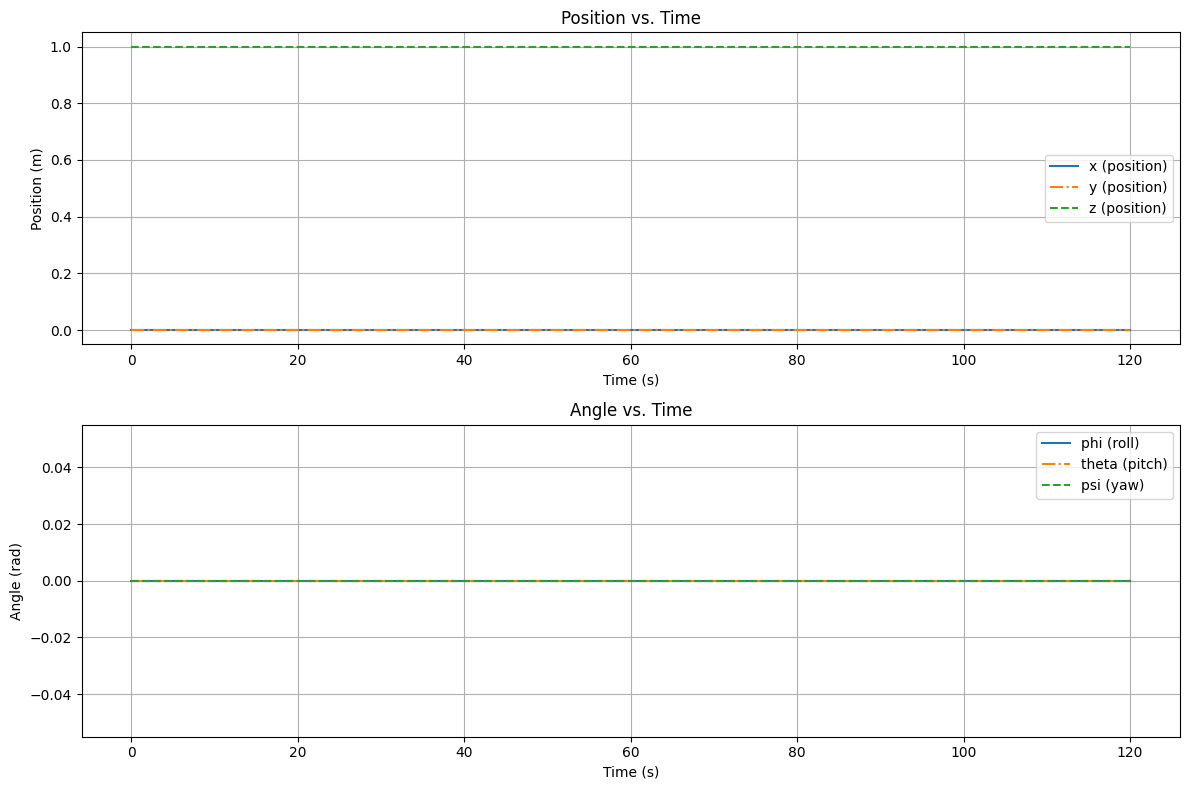

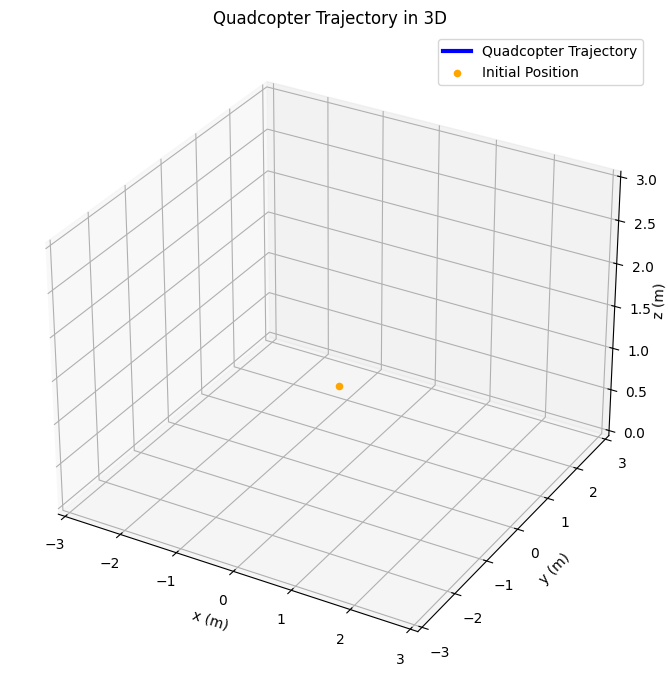

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

m = .355   # (kg)
g = 9.81   # (m/s^2)
k = .000001   # Lift constant
b = 0    # Drag constant
l = 0.084    # Arm Length (m)
Ix = 0.000512
Iy = 0.000623
Iz = 0.000516

w1 = 933.079579
w2 = 933.079579
w3 = 933.079579
w4 = 933.079579

def equations(t, state):
    x, y, z, phi, theta, psi, xdot, ydot, zdot, phidot, thetadot, psidot = state

    # Forces and torques
    T = k * (w1**2 + w2**2 + w3**2 + w4**2)           # Total thrust
    tau_phi = l * k * (w2**2 - w4**2)                # Torque about x-axis
    tau_theta = l * k * (w3**2 - w1**2)              # Torque about y-axis
    tau_psi = b * (w1**2 - w2**2 + w3**2 - w4**2)    # Torque about z-axis

    # Accelerations
    xddot = (T/m)*(np.sin(phi)*np.sin(psi) + np.cos(phi)*np.sin(theta)*np.cos(psi))
    yddot = (T/m)*(-np.sin(phi)*np.cos(psi) + np.cos(phi)*np.sin(theta)*np.sin(psi))
    zddot = (T / m)*np.cos(phi)*np.cos(theta) - g

    phiddot = (1 / Ix) * (tau_phi - (Iy - Iz) * thetadot * psidot)
    thetaddot = (1 / Iy) * (tau_theta - (Iz - Ix) * phidot * psidot)
    psiddot = (1 / Iz) * (tau_psi - (Ix - Iy) * phidot * thetadot)

    return [
        xdot, ydot, zdot, phidot, thetadot, psidot,
        xddot, yddot, zddot, phiddot, thetaddot, psiddot
    ]

initial_state = [
    0, 0, 1,      # Initial positions (x, y, z)
    0, 0, 0,      # Initial angles (phi, theta, psi)
    0, 0, 0,      # Initial velocities (xdot, ydot, zdot)
    0, 0, 0       # Initial angular velocities (phidot, thetadot, psidot)
]

t_span = (0, 120)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

solution = solve_ivp(equations, t_span, initial_state, t_eval=t_eval, method='RK45')

x, y, z, phi, theta, psi = solution.y[:6]

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(solution.t, x, label='x (position)', linestyle='-')
plt.plot(solution.t, y, label='y (position)', linestyle='-.')
plt.plot(solution.t, z, label='z (position)', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs. Time')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(solution.t, phi, label='phi (roll)', linestyle='-')
plt.plot(solution.t, theta, label='theta (pitch)', linestyle='-.')
plt.plot(solution.t, psi, label='psi (yaw)', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Angle vs. Time')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

fig_3D = plt.figure(figsize=(8,8))
ax = fig_3D.add_subplot(111, projection='3d')
ax.plot3D(solution.y[0], solution.y[1], solution.y[2], label='Quadcopter Trajectory', color='b', linewidth=3)
ax.scatter(solution.y[0][0], solution.y[1][0], solution.y[2][0], color='orange', s=20, label='Initial Position')
ax.set_title('Quadcopter Trajectory in 3D')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)', labelpad=-1)
ax.legend()
ax.grid()
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(0, 3)
fig_3D.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

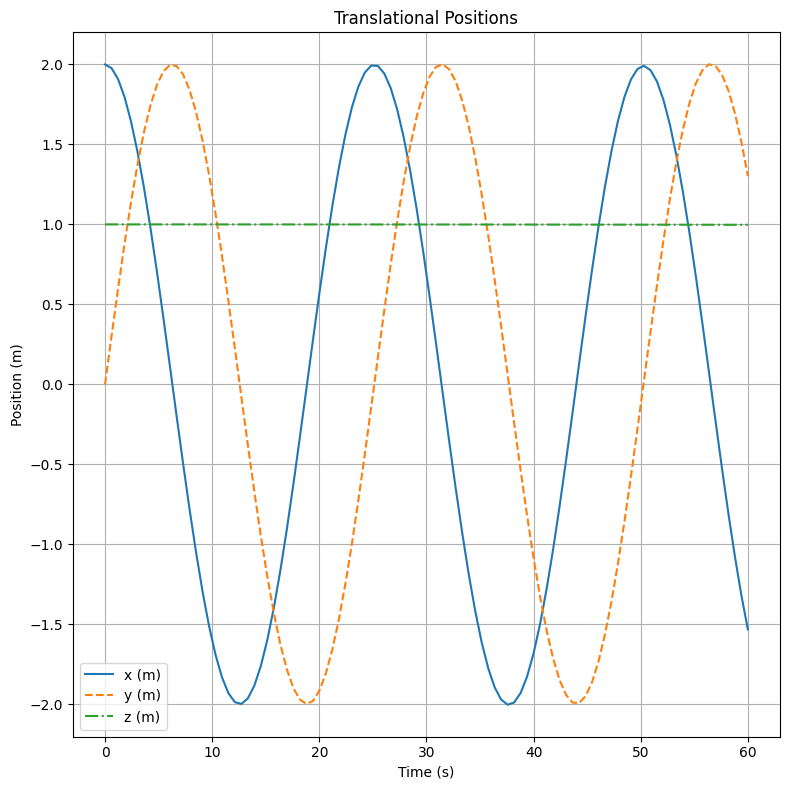

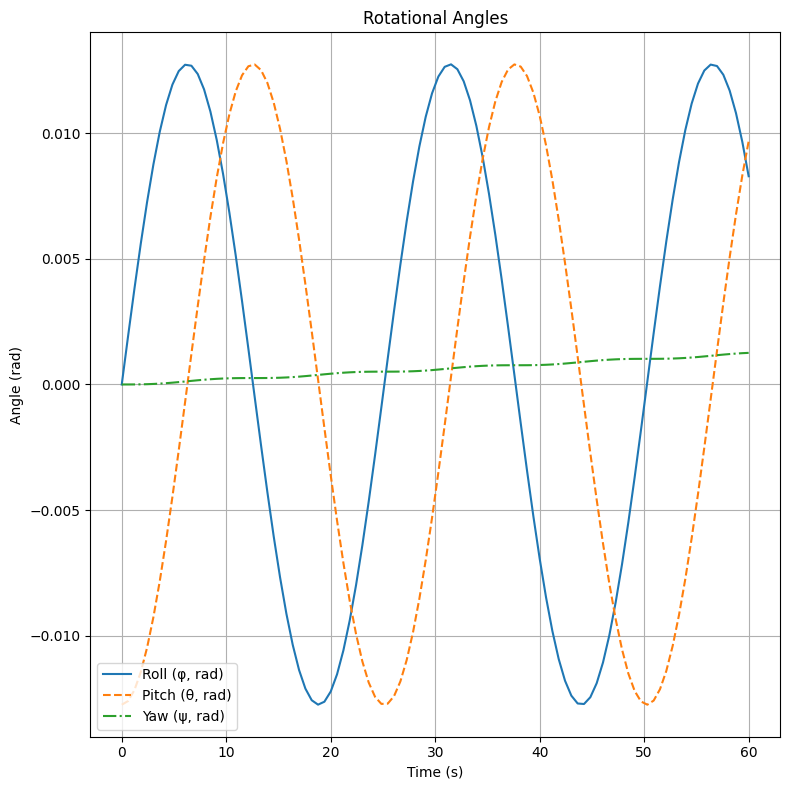

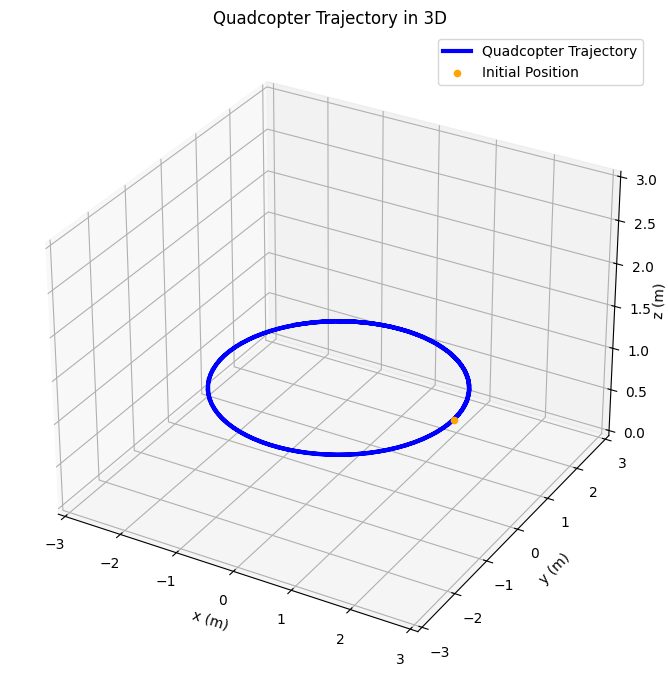

In [3]:

Ixx, Iyy, Izz = 0.00487549, 0.00487549, 0.00961741  # (kg·m²)
m = .675  # (kg)
g = 9.81  # (m/s²)
#k and b are values provided from a research paper
k = 2.980e-6 # Lift coefficient
b = 1.140e-7 # Drag coefficient
l = 0.1778   # Arm Length (m)

w_h = 745.3294168335-0.0303 #(rad/s)

w_circle = 0.25 #rad/s

def phi_t(t):
  return .0127417104*np.sin(w_circle*t)

def theta_t(t):
  return .0127417104*np.cos(w_circle*t)

def rotor_speeds(t, w_h):

  phi = phi_t(t)
  theta = theta_t(t)

  omega1 = w_h*(1-phi-theta)
  omega2 = w_h*(1-phi+theta)
  omega3 = w_h*(1+phi+theta)
  omega4 = w_h*(1+phi-theta)

  return [omega1, omega2, omega3, omega4]

def angular_veocities(t):

  omega_1 = .0127417104*w_circle*np.cos(w_circle*t)
  omega_2 = .0127417104*w_circle*np.sin(w_circle*t)
  omega_3 = 0

  return omega_1, omega_2, omega_3


def rotor_forces_torques(rotor_speeds,k,b,l):

    T =  k*(rotor_speeds[0]**2+rotor_speeds[1]**2+rotor_speeds[2]**2+rotor_speeds[3]**2)  # Total thrust
    tau_phi = l*k*(rotor_speeds[3]**2 - rotor_speeds[1]**2)  # Roll torque
    tau_theta = l*k*(rotor_speeds[2]**2 - rotor_speeds[0]**2)  # Pitch torque
    tau_psi = b*(rotor_speeds[0]**2 - rotor_speeds[1]**2 + rotor_speeds[2]**2 - rotor_speeds[3]**2)  # Yaw torque
    return T, tau_phi, tau_theta, tau_psi

def quadcopter_dynamics(t, state, rotor_speeds):
    x, y, z, phi, theta, psi, x_dot, y_dot, z_dot, omega1, omega2, omega3 = state


    R_phi = np.array([[1,0,0],
                    [0,np.cos(phi),-np.sin(phi)],
                    [0,np.sin(phi), np.cos(phi)]])

    R_theta = np.array([[np.cos(theta),0,np.sin(theta)],
                      [0,1,0],
                      [-np.sin(theta),0,np.cos(theta)]])

    R_psi = np.array([[np.cos(psi),-np.sin(psi),0],
                    [np.sin(psi),np.cos(psi),0],
                    [0,0,1]])

    R = R_psi @ R_theta @ R_phi

    omega1, omega2, omega3 = angular_veocities(t)

    rotor_speeds = rotor_speeds(t,w_h)

    T, tau_phi, tau_theta, tau_psi = rotor_forces_torques(rotor_speeds,k,b,l)

    x_ddot = (T / m) * R[0, 2]
    y_ddot = (T / m) * R[1, 2]
    z_ddot = (T / m) * R[2, 2] - g

    omega1_dot = (tau_phi + (Iyy - Izz) * omega2 * omega3) / Ixx
    omega2_dot = (tau_theta + (Izz - Ixx) * omega3 * omega1) / Iyy
    omega3_dot = (tau_psi + (Ixx - Iyy) * omega1 * omega2) / Izz

    B_inv = np.array([
        [1, np.sin(phi) * np.tan(theta), np.cos(phi) * np.tan(theta)],
        [0, np.cos(phi), -np.sin(phi)],
        [0, np.sin(phi) / np.cos(theta), np.cos(phi) / np.cos(theta)],
    ])

    euler_rates = B_inv @ np.array([omega1, omega2, omega3])

    phi_dot, theta_dot, psi_dot = euler_rates


    return [
        x_dot, y_dot, z_dot,  # Position derivatives
        phi_dot, theta_dot, psi_dot,  # Euler angles derivatives
        x_ddot, y_ddot, z_ddot,  # Velocity derivatives
        omega1_dot, omega2_dot, omega3_dot  # Angular velocity derivatives
    ]

# Initial state [x, y, z, phi, theta, psi, x_dot, y_dot, z_dot, omega1, omega2, omega3]
initial_state = [2, 0, 1, 0, -.0127417104, 0, 0, .5, 0, angular_veocities(0)[0], angular_veocities(0)[1], angular_veocities(0)[2]]


t_span = (0, 60)
t_eval = np.linspace(0, 60, 100)

sol = solve_ivp(quadcopter_dynamics, t_span, initial_state, args=(rotor_speeds,), t_eval=t_eval,atol=1e-9, rtol=1e-6)


plt.figure(figsize=(8,8))
plt.plot(sol.t, sol.y[0], label='x (m)', linestyle='-')  # x
plt.plot(sol.t, sol.y[1], label='y (m)', linestyle='--')  # y
plt.plot(sol.t, sol.y[2], label='z (m)', linestyle='-.')  # z
plt.title('Translational Positions')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid()
plt.tight_layout()

plt.figure(figsize=(8,8))
plt.plot(sol.t, sol.y[3], label='Roll (φ, rad)', linestyle='-')  # phi
plt.plot(sol.t, sol.y[4], label='Pitch (θ, rad)', linestyle='--')  # theta
plt.plot(sol.t, sol.y[5], label='Yaw (ψ, rad)', linestyle='-.')  # psi
plt.title('Rotational Angles')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()
plt.grid()
plt.tight_layout()

fig_3D = plt.figure(figsize=(8,8))
ax = fig_3D.add_subplot(111, projection='3d')
ax.plot3D(sol.y[0], sol.y[1], sol.y[2], label='Quadcopter Trajectory', color='b', linewidth=3)
ax.scatter(sol.y[0][0], sol.y[1][0], sol.y[2][0], color='orange', s=20, label='Initial Position')
ax.set_title('Quadcopter Trajectory in 3D')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)', labelpad=-1)
ax.legend()
ax.grid()
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(0, 3)
fig_3D.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

plt.show()


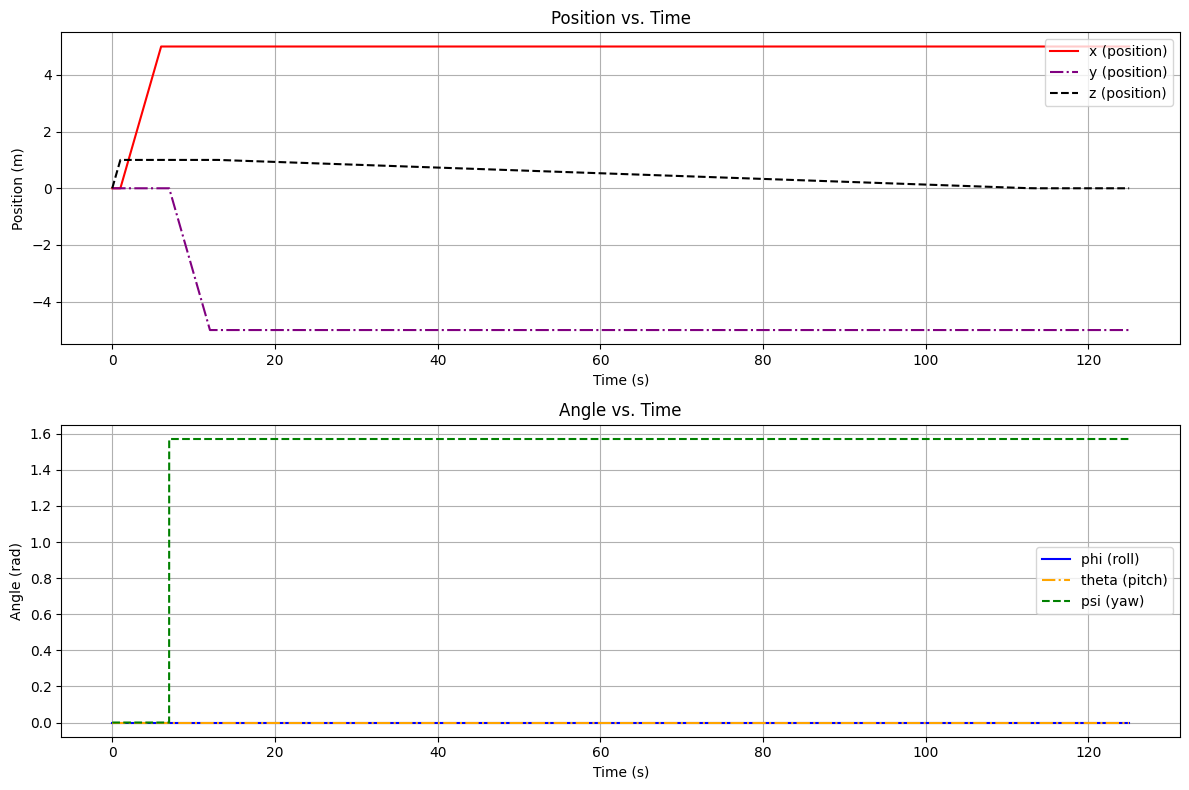

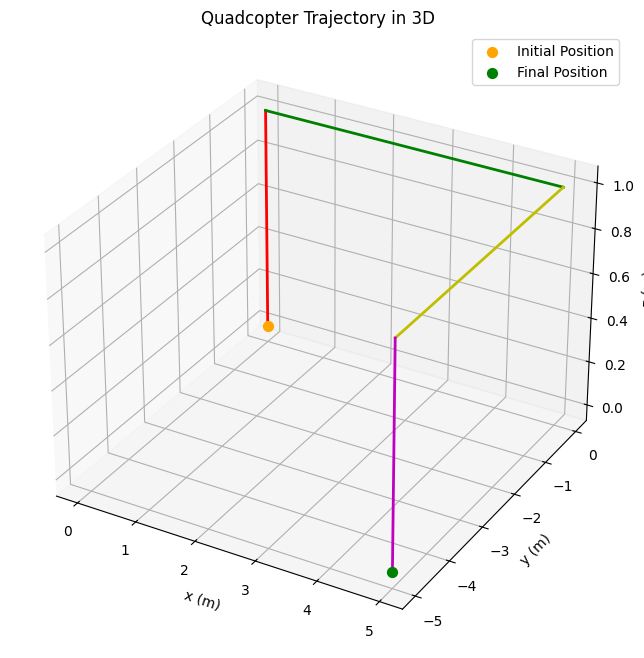

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

m = 0.355  # (kg)
g = 9.81  # (m/s^2)
k = 0.000001  # Lift constant
b = 0.000001  # Drag constant
l = 0.084  # Arm length (m)
Ix = 0.000512
Iy = 0.000623
Iz = 0.000516

w_hover = 933.079579 - 0.0380

def r_speed(t, w_hover, phi=0, theta=0):
    w1 = w_hover * (1 - phi - theta)
    w2 = w_hover * (1 - phi + theta)
    w3 = w_hover * (1 + phi + theta)
    w4 = w_hover * (1 + phi - theta)
    return [w1, w2, w3, w4]

def ang_velo(t):
    return 0, 0, 0

def torques(k, b, l, r_speed):
    T = k * sum(omega**2 for omega in r_speed)  # Total thrust
    tau_phi = l * k * (r_speed[3]**2 - r_speed[1]**2)  # Torque about x-axis
    tau_theta = l * k * (r_speed[2]**2 - r_speed[0]**2)  # Torque about y-axis
    tau_psi = b * (r_speed[0]**2 - r_speed[1]**2 + r_speed[2]**2 - r_speed[3]**2)  # Torque about z-axis
    return T, tau_phi, tau_theta, tau_psi

def dyn(t, state):
    x, y, z, phi, theta, psi, xdot, ydot, zdot, o1, o2, o3 = state

    R_phi = np.array([[1, 0, 0],
                      [0, np.cos(phi), -np.sin(phi)],
                      [0, np.sin(phi), np.cos(phi)]])
    R_theta = np.array([[np.cos(theta), 0, np.sin(theta)],
                        [0, 1, 0],
                        [-np.sin(theta), 0, np.cos(theta)]])
    R_psi = np.array([[np.cos(psi), -np.sin(psi), 0],
                      [np.sin(psi), np.cos(psi), 0],
                      [0, 0, 1]])

    rotmat = R_psi @ R_theta @ R_phi

    o1, o2, o3 = ang_velo(t)
    r_speed_values = r_speed(t, w_hover)
    T, tau_phi, tau_theta, tau_psi = torques(k, b, l, r_speed_values)

    xddot = (T/m) * rotmat[0, 2]
    yddot = (T/m) * rotmat[1, 2]
    zddot = (T/m) * rotmat[2, 2] - g

    o1dot = (1 / Ix) * (tau_phi + (Iy - Iz) * o2 * o3)
    o2dot = (1 / Iy) * (tau_theta + (Iz - Ix) * o1 * o3)
    o3dot = (1 / Iz) * (tau_psi + (Ix - Iy) * o1 * o2)

    invmat = np.array([
        [1, np.sin(phi) * np.tan(theta), np.cos(phi) * np.tan(theta)],
        [0, np.cos(phi), -np.sin(phi)],
        [0, np.sin(phi) / np.cos(theta), np.cos(phi) / np.cos(theta)]])

    euler = invmat @ np.array([o1, o2, o3])
    phidot, thetadot, psidot = euler

    return [
        xdot, ydot, zdot, phidot, thetadot, psidot,
        xddot, yddot, zddot, o1dot, o2dot, o3dot
    ]

def define_path(t):
    if t < 1:  # Ascend vertically to 1m
        return 0, 0, t, 0, 0, 0
    elif t < 6:  # Move straight at 1m altitude
        return t - 1, 0, 1, 0, 0, 0
    elif t < 7:  # Hover
        return 5, 0, 1, 0, 0, 0
    elif t < 12:  # Move left
        return 5, -(t-7), 1, 0, 0, np.pi / 2
    elif t < 13:  # Hover
        return 5, -5, 1, 0, 0, np.pi / 2
    else:  # Descend vertically at no more than 0.01 m/s
        descent_speed = 0.01
        z = max(0, 1 - descent_speed * (t - 13))
        return 5, -5, z, 0, 0, np.pi / 2

segments = [
    (np.linspace(0, 1, 100), 'r'),
    (np.linspace(1, 6, 100), 'g'),
    (np.linspace(6, 7, 100), 'b'),
    (np.linspace(7, 12, 100), 'y'),
    (np.linspace(12, 13, 100), 'c'),
    (np.linspace(13, 125, 100), 'm')
]

trajectories = []
for time_segment, color in segments:
    segment_states = [define_path(t) for t in time_segment]
    trajectories.append((np.array(segment_states), color))


time_points = np.hstack([segment[0] for segment in segments])
states = np.vstack([np.array([define_path(t) for t in segment[0]]) for segment in segments])

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(time_points, states[:, 0], label='x (position)', linestyle='-', color='red')
plt.plot(time_points, states[:, 1], label='y (position)', linestyle='-.', color='purple')
plt.plot(time_points, states[:, 2], label='z (position)', linestyle='--', color='black')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs. Time')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time_points, states[:, 3], label='phi (roll)', linestyle='-', color='blue')
plt.plot(time_points, states[:, 4], label='theta (pitch)', linestyle='-.', color='orange')
plt.plot(time_points, states[:, 5], label='psi (yaw)', linestyle='--', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Angle vs. Time')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

fig_3D = plt.figure(figsize=(10, 8))
ax = fig_3D.add_subplot(111, projection='3d')

for trajectory, color in trajectories:
    ax.plot3D(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], color=color, linewidth=2)

ax.scatter(trajectories[0][0][0, 0], trajectories[0][0][0, 1], trajectories[0][0][0, 2],
           color='orange', s=50, label='Initial Position')
ax.scatter(trajectories[-1][0][-1, 0], trajectories[-1][0][-1, 1], trajectories[-1][0][-1, 2],
           color='green', s=50, label='Final Position')

ax.set_title('Quadcopter Trajectory in 3D')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.legend()
ax.grid()

plt.show()
